In [45]:
import os
import sys
import pandas as pd
import matplotlib.pyplot as plt

result_dirs = ["v1", "v2"]
curr_path = os.getcwd()
times = {}
for result_dir in result_dirs:
    result_dir_path = os.path.join(curr_path, result_dir)
    id = result_dir.upper()
    times[id] = {}
    for file in os.listdir(result_dir_path):
        print(file)
        file_path = os.path.join(result_dir_path, file)
        tmp = file.split("-")
#         id = "{}-{}".format(tmp[2],tmp[1])
        times[id][tmp[2]] = {} 
#         times[id][tmp[2]] = []        
        times[id][tmp[2]]["all"] = []        
        with open(file_path, "r") as f:
            lines = f.readlines()
            for offset, time_mark in enumerate(lines):
                t = round(float(time_mark[12:]),4)
#                 times[id][tmp[2]].append(t)
                times[id][tmp[2]]["all"].append(t)
                if (offset == 6):
                    times[id][tmp[2]]["median"] = t
print(times)

test-V1-N5000-time-results.txt
test-V1-N1000-time-results.txt
test-V1-N10000-time-results.txt
test-V1-N2500-time-results.txt
test-V2-N1000-time-results.txt
test-V2-N2500-time-results.txt
test-V2-N5000-time-results.txt
test-V2-N10000-time-results.txt
{'V1': {'N5000': {'all': [0.3144, 0.3352, 0.344, 0.3498, 0.3533, 0.3588, 0.3679, 0.3721, 0.3732, 0.3859, 0.4023], 'median': 0.3679}, 'N1000': {'all': [0.0644, 0.0652, 0.0656, 0.069, 0.0695, 0.0698, 0.0715, 0.0763, 0.079, 0.0834, 0.1088], 'median': 0.0715}, 'N10000': {'all': [0.6163, 0.6788, 0.6853, 0.698, 0.7129, 0.7132, 0.7152, 0.7156, 0.7218, 0.7228, 0.7257], 'median': 0.7152}, 'N2500': {'all': [0.1569, 0.1634, 0.1694, 0.1702, 0.1749, 0.1875, 0.1886, 0.1956, 0.1978, 0.1989, 0.2075], 'median': 0.1886}}, 'V2': {'N1000': {'all': [0.0211, 0.0214, 0.0217, 0.0226, 0.0228, 0.0228, 0.0231, 0.0233, 0.0296, 0.0364, 0.0655], 'median': 0.0231}, 'N2500': {'all': [0.0506, 0.0509, 0.051, 0.0554, 0.0557, 0.0576, 0.0584, 0.0591, 0.0592, 0.0631, 0.1045], '

In [54]:
v1 = "V1"
v2 = "V2"
print("Median times for N requests:")
for i in times[v1]:
#         print(times[t][i])
    print("\t{} requests -> V1 median: {}s".format(i, times[v1][i]["median"]))

Version: V1 - Median times for N requests:
	N5000 requests - median: 0.3679s
	N1000 requests - median: 0.0715s
	N10000 requests - median: 0.7152s
	N2500 requests - median: 0.1886s
Version: V2 - Median times for N requests:
	N1000 requests - median: 0.0231s
	N2500 requests - median: 0.0584s
	N5000 requests - median: 0.1165s
	N10000 requests - median: 0.2576s


In [41]:
df1 = pd.DataFrame(times["V1"])
df2 = pd.DataFrame(times["V2"])
# print(df1)
# print(df2)

print("Mediana de tempos V1 (em segundos) para cada N requests :\n")
print(df1.median())

print("Mediana de tempos V2 (em segundos) para cada N requests :\n")
print(df2.median())

# cols = ["N5000","N1000","N10000","N2500"]
# grouped1 = {}
# grouped2 = {}

# for col in cols:
#     grouped1[col] = df1.groupby(['CLIENT', 'TEST'])[['TIME_S']]
# grouped1 = df1.groupby(['CLIENT', 'TEST'])[['TIME_S']]

Mediana de tempos V1 (em segundos) para cada N requests :

N5000     0.3588
N1000     0.0698
N10000    0.7132
N2500     0.1875
dtype: float64
Mediana de tempos V2 (em segundos) para cada N requests :

N1000     0.0228
N2500     0.0576
N5000     0.1156
N10000    0.2527
dtype: float64


In [26]:
for i in times:
    print(i)
    for j in times[i]:
        print(i, j)
        for k in times[i][j]:
            print(i,j,k)

V1
V1 N5000
V1 N5000 all
V1 N5000 median
V1 N1000
V1 N1000 all
V1 N1000 median
V1 N10000
V1 N10000 all
V1 N10000 median
V1 N2500
V1 N2500 all
V1 N2500 median
V2
V2 N1000
V2 N1000 all
V2 N1000 median
V2 N2500
V2 N2500 all
V2 N2500 median
V2 N5000
V2 N5000 all
V2 N5000 median
V2 N10000
V2 N10000 all
V2 N10000 median


In [16]:

# %matplotlib inline
for file in times:
    print(times[file]["median"], file)


0.3679 N5000-V1
0.0715 N1000-V1
0.7152 N10000-V1
0.1886 N2500-V1
0.0231 N1000-V2
0.0584 N2500-V2
0.1165 N5000-V2
0.2576 N10000-V2


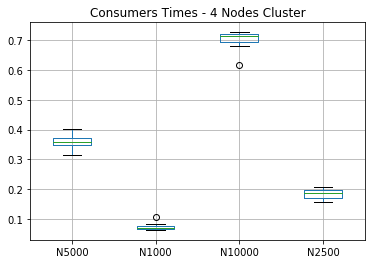

In [58]:
df1.boxplot()
title_boxplot = 'Consumers Times - 4 Nodes Cluster'
plt.title( title_boxplot )
plt.suptitle('')
#plt.ylim(0, 0.005)
plt.show()

/home/Marcelo/anaconda3/lib/python3.7/site-packages/matplotlib/font_manager.py:1331: UserWarning: findfont: Font family ['Times New Roman'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


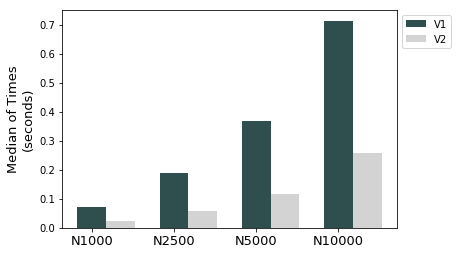

In [59]:

from matplotlib.font_manager import FontProperties

v1_median_times = [0.0715, 0.1886, 0.3679, 0.7152]
v2_median_times = [0.0231, 0.0584, 0.1165, 0.2576]

x_labels = ['N1000','N2500','N5000','N10000']
bar_width = 0.35
x = [0,1,2,3]
x2 = []
for i in range(len(x)):
    x2.append(x[i] + bar_width)
    
font = {'fontname':'Times New Roman','size'   : 13 }

plt.ylabel('Median of Times\n(seconds)', **font)

p1 = plt.bar(x, v1_median_times, width = bar_width, color='#2f4f4f')
p2 = plt.bar(x2, v2_median_times, width = bar_width, color='#d3d3d3')
_ = plt.xticks(x, x_labels, **font)
# _ = plt.xticks(x, x_labels)

# fontP = FontProperties()
# fontP.set_size('small')

plt.legend((p1[0], p2[0]), ('V1', 'V2'), bbox_to_anchor=(1,1))

plt.show()
